In [1]:
import pickle
from ipywidgets import interact, widgets, interactive, fixed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from ikmeans.ikmeans import IKMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open('datasets/original_db1565005947584077.pickle', 'rb') as f:
     data = np.asarray(pickle.load(f))
with open('datasets/labels_db1565005947584077.pickle', 'rb') as f:
     labels = pickle.load(f)
colors = ['r', 'g', 'b', 'y']
colors_plot = [colors[c] for c in labels]

data = data[:256*40]

## Реализация I-K-Means

### Сентитические данных

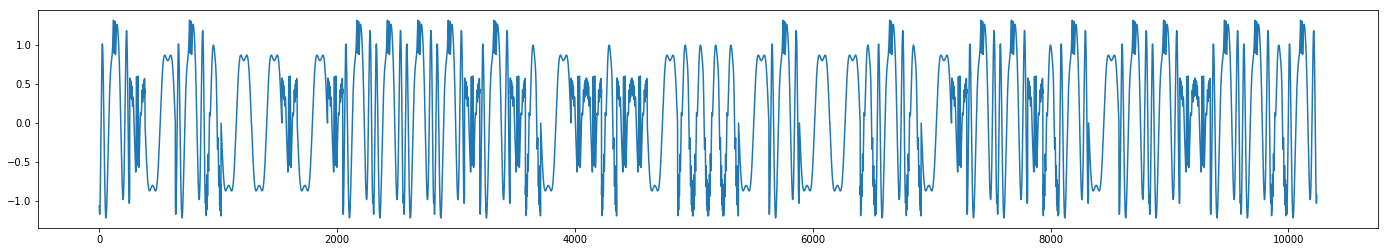

In [3]:
plt.figure(figsize = (24,4))
plt.plot(data)

In [4]:
def main(data, start_level = 9, deep = 2, clusters_count = 4):
    start_lvl = start_level
    deep = deep

    ikmeans = IKMeans(data, start_lvl = start_lvl, k = clusters_count)
    plt.figure(figsize = (10,10))

    for i in range(0, deep):
        plt.subplot(10,1,i+1)      
        plt.plot(ikmeans.cur_cA)

        ikmeans.next_lvl()
        ikmeans.fit()
        
    return ikmeans

In [5]:
w = interactive(main, data = fixed(data),
                          level=widgets.IntSlider(min=4, max=15, step=1, value=9),
                          deep=widgets.IntSlider(min=2, max=10, step=1, value=2))
display(w)
ikmeans = w.result

interactive(children=(IntSlider(value=9, description='start_level', max=27, min=-9), IntSlider(value=2, descri…

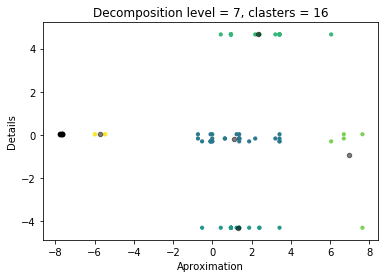

In [6]:
ikmeans.plot_clusters()

In [7]:
def plot_claster(i = 0, count = 4):
    global patterns
    patterns[i].plot(count = count)

In [8]:
patterns = ikmeans.clasters.sorted_patterns
interact(plot_claster, i = widgets.IntSlider(min=0, max=len(patterns), step=1, value=0), count = 4)

interactive(children=(IntSlider(value=0, description='i', max=6), IntSlider(value=4, description='count', max=…

<function __main__.plot_claster(i=0, count=4)>

### Реальные данные

In [9]:
data = pd.read_csv("data.csv", skiprows = 5, header = None, sep="\s+")
data.head(3)
names = ("<Дата в форме ГГГГММДД:8:0>"+
         "<Время в форме ЧЧ:2:0>"+
         "<Модуль скорости ветра, м/ c :4:1>"+
       "<Направление ветра , o :3:0> <Уровень, см, 3:0> <Модуль скорости течений на поверхностном горизонте, см/ c :5:1>"+
        "<Направление течений на поверхностном горизонте , o , 0>."+
      #  "........... (все горизонты от поверхности - до дна) ............ "+
        "<Модуль скорости течений на придонном горизонте, см/ c :5:1>"+
        "<Направление течений на придонном горизонте , o , 0>"+
        "<Значительные высоты волн, м, 4:1>"+
        "<Периоды пика волн, с, 5:2>"+
        "<Средние периоды волн, с, 5:2>"+
        "<Направления волн , o ,3:0>"+
        "<Концентрация льда:4:2>").split("><")

In [10]:
def get_train_data(i = 4):
    plt.figure(figsize = (20,4))
    plt.plot(data[i])    
    return data[i]

In [11]:
w = interactive(get_train_data, i=widgets.IntSlider(min=2, max=14, step=1, value=4))
display(w)
train_data = w.result

interactive(children=(IntSlider(value=4, description='i', max=14, min=2), Output()), _dom_classes=('widget-int…

In [12]:
w = interactive(main, data = fixed(train_data),
                          level=widgets.IntSlider(min=4, max=10, step=1, value=9),
                          deep=widgets.IntSlider(min=2, max=10, step=1, value=2))
display(w)


interactive(children=(IntSlider(value=9, description='start_level', max=27, min=-9), IntSlider(value=2, descri…

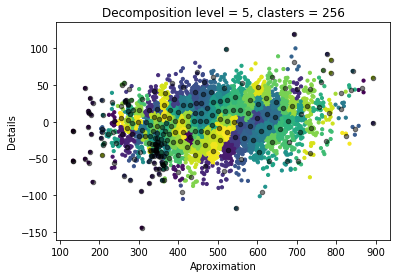

In [20]:
ikmeans = w.result
ikmeans.plot_clusters()

In [21]:
patterns = ikmeans.clasters.sorted_patterns
interact(plot_claster, i = widgets.IntSlider(min=0, max=len(patterns), step=1, value=0), count = 4)

interactive(children=(IntSlider(value=0, description='i', max=173), IntSlider(value=4, description='count', ma…

<function __main__.plot_claster(i=0, count=4)>